In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sub2subj = {"sub-01":"subj001", "sub-02":"subj002","sub-03":"subj003","sub-04":"subj005",
              "sub-05":"subj006", "sub-06":"subj007", "sub-07":"subj008", "sub-08":"subj009", 
           "sub-09":"subj010","sub-10":"subj011","sub-11":"subj013", "sub-12":"subj014", 
            "sub-13":"subj017", "sub-14":"subj018", "sub-15":"subj019", "sub-16":"subj020",
           "sub-17":"subj021", "sub-18":"subj022", "sub-19":"subj023", "sub-20":"subj024",'sub-21':'subj025',
           'sub-22':'subj026','sub-23':'subj027','sub-24':'subj029','sub-25':'subj031'}
subject_ids = list(sub2subj.values())



In [7]:
os.chdir('/data/MoL_clean/scripts')

In [8]:
def scoring(encode, retrieve,screening = False):
    score_unordered = 0
    retrieve_order = []
    retrieve_valid = []
    score_ordered = 0
    for i in range(len(retrieve[:40])):
        if retrieve[i] in encode and retrieve[i] not in retrieve_valid:
            retrieve_order.append(encode.index(retrieve[i]))
            retrieve_valid.append(retrieve[i])
            score_unordered += 1
    for i in range(len(retrieve_order)):
        if i == 0 and retrieve_order != []:
            score_ordered += 1
        elif retrieve_order[i] > retrieve_order[i-1]:
            score_ordered += 1
    if screening:
        try:
            additional_retrieval = retrieve[40].replace(" ", "").split(",")
            for w in additional_retrieval:
                if w in encode and w not in retrieve_valid:
                    retrieve_valid.append(w)
                    score_unordered += 1
        except:
            pass

    return score_unordered, score_ordered, retrieve_order

In [9]:
sub_score_ordered_screening = []
sub_score_unordered_screening = []
sub_retrieve_order_screening = []

sub_score_ordered_W2 = []
sub_score_unordered_W2 = []
sub_retrieve_order_W2 = []

sub_score_ordered_W4D1 = []
sub_score_unordered_W4D1 = []
sub_retrieve_order_W4D1 = []

sub_score_ordered_W4D2 = []
sub_score_unordered_W4D2 = []
sub_retrieve_order_W4D2 = []



for subject in subject_ids:
    sheet = pd.read_excel('../updated_sheets/performance_all_screening.xlsx', sheet_name=subject)
    Encode_screening = list(sheet[subject][1:41])
    Retrieve_screening = list(sheet['Unnamed: 1'][1:42])

    Encode_W2 = list(sheet['Unnamed: 3'][1:41])
    Retrieve_W2 = list(sheet['Unnamed: 4'][1:41])

    Encode_W4D1 = list(sheet['Unnamed: 6'][1:41])
    Retrieve_W4D1 = list(sheet['Unnamed: 7'][1:41])

    Encode_W4D2 = list(sheet['Unnamed: 9'][1:21])
    Retrieve_W4D2 = list(sheet['Unnamed: 10'][1:21])

    sub_score_ordered_screening.append(scoring(Encode_screening, Retrieve_screening,screening = True)[1])
    sub_score_unordered_screening.append(scoring(Encode_screening, Retrieve_screening, screening= True)[0])
    sub_retrieve_order_screening.append(scoring(Encode_screening, Retrieve_screening, screening= True)[2])
    
    sub_score_ordered_W2.append(scoring(Encode_W2, Retrieve_W2)[1])
    sub_score_unordered_W2.append(scoring(Encode_W2, Retrieve_W2)[0])
    sub_retrieve_order_W2.append(scoring(Encode_W2, Retrieve_W2)[2])

    sub_score_ordered_W4D1.append(scoring(Encode_W4D1, Retrieve_W4D1)[1])
    sub_score_unordered_W4D1.append(scoring(Encode_W4D1, Retrieve_W4D1)[0])
    sub_retrieve_order_W4D1.append(scoring(Encode_W4D1, Retrieve_W4D1)[2])
    

    sub_score_ordered_W4D2.append(scoring(Encode_W4D2, Retrieve_W4D2)[1])
    sub_score_unordered_W4D2.append(scoring(Encode_W4D2, Retrieve_W4D2)[0])
    sub_retrieve_order_W4D2.append(scoring(Encode_W4D2, Retrieve_W4D2)[2])




In [23]:
screening_pos_recall_prob = []
W2_pos_recall_prob = []
W4D1_pos_recall_prob = []
W4D2_pos_recall_prob = []

for i in range(40):
    count_screen = 0
    count_W2 = 0
    count_W4D1 = 0
    count_W4D2 = 0
    for s in range(25):
        if i in sub_retrieve_order_screening[s]:
            count_screen += 1
        if i in sub_retrieve_order_W2[s]:
            count_W2 += 1
        if i in sub_retrieve_order_W4D1[s]:
            count_W4D1 += 1
        if i in sub_retrieve_order_W4D2[s]:
            count_W4D2 += 1
    screening_pos_recall_prob.append(count_screen/25)
    W2_pos_recall_prob.append(count_W2/25)
    W4D1_pos_recall_prob.append(count_W4D1/25)
    W4D2_pos_recall_prob.append(count_W4D2/25)

    

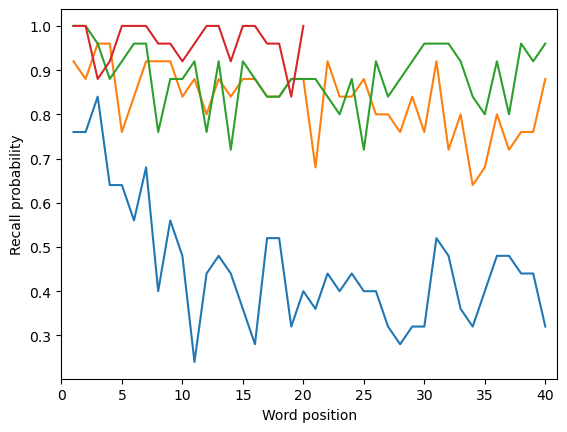

In [68]:
plt.plot(screening_pos_recall_prob)
plt.plot(W2_pos_recall_prob)
plt.plot(W4D1_pos_recall_prob)
plt.plot(W4D2_pos_recall_prob[:20])
plt.xlim(0,40)
plt.xticks([-1,4,9,14,19,24,29,34,39], [0,5,10,15,20,25,30,35,40])
#plt.xticks(np.arange(40), np.arange(1, 41))

#plt.tick_params(axis='x', labelsize=6)
plt.xlabel('Word position')
plt.ylabel('Recall probability')
plt.savefig('recall_probability.svg')

In [8]:
# form a dataframe from the sub_scores

print(np.mean(sub_score_ordered_screening))
print(np.std(sub_score_ordered_screening))

14.44
7.9250488957482155


In [9]:
print(np.mean(sub_score_ordered_W2))
print(np.std(sub_score_ordered_W2))


33.16
5.065017275390085


In [10]:
print(np.mean(sub_score_ordered_W4D1))
print(np.std(sub_score_ordered_W4D1))

35.24
3.723224409030431


In [11]:
print(np.mean(sub_score_ordered_W4D2))
print(np.std(sub_score_ordered_W4D2))

19.2
1.019803902718557


In [47]:
df_visual = {'Screening':sub_score_ordered_screening, 'W2':sub_score_ordered_W2, 'W4D1':sub_score_ordered_W4D1, 'W4D2':sub_score_ordered_W4D2}

df_visual = pd.DataFrame(df_visual)

df_visual = df_visual.melt(var_name='Session', value_name='Score')
df_visual['W4D2'] = df_visual['Session'] == 'W4D2'

In [13]:
df_visual

,Session,Score,W4D2
0,Screening,33,False
1,Screening,8,False
2,Screening,28,False
3,Screening,12,False
4,Screening,10,False
...,...,...,...
95,W4D2,20,True
96,W4D2,20,True
97,W4D2,19,True
98,W4D2,19,True


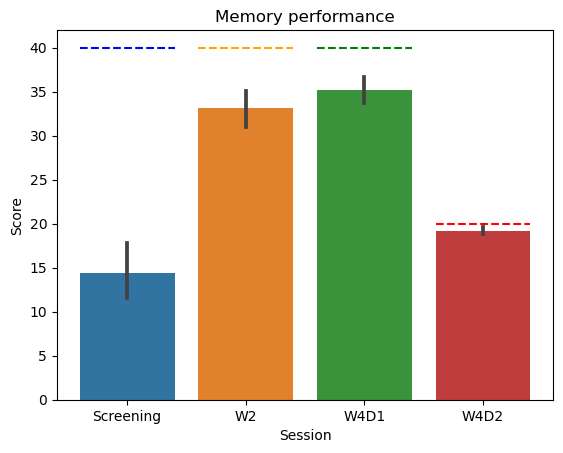

In [53]:
sns.barplot(data = df_visual, x = 'Session', y = 'Score')
plt.hlines(y =40,xmin = -0.4, xmax = 0.4, color = 'blue',linestyle = '--')
plt.hlines(y =40,xmin = 0.6, xmax = 1.4, color = 'orange',linestyle = '--')
plt.hlines(y =40,xmin = 1.6, xmax = 2.4, color = 'green',linestyle = '--')
plt.hlines(y =20,xmin = 2.6, xmax = 3.4, color = 'red',linestyle = '--')
plt.title('Memory performance')
plt.savefig('memory_performance.svg')